In [7]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
data = fetch_20newsgroups()

# Print the category names
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
categorise = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

train = fetch_20newsgroups(subset ='train', categories=categorise)
test = fetch_20newsgroups(subset ='test', categories=categorise)
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text to numbers
from sklearn.naive_bayes import MultinomialNB  # Sorting (categorizing text)
from sklearn.pipeline import make_pipeline  # Conveyor belt for steps


model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

predicted = model.predict(test.data)

Text(74.45000000000005, 0.5, 'predicted label')

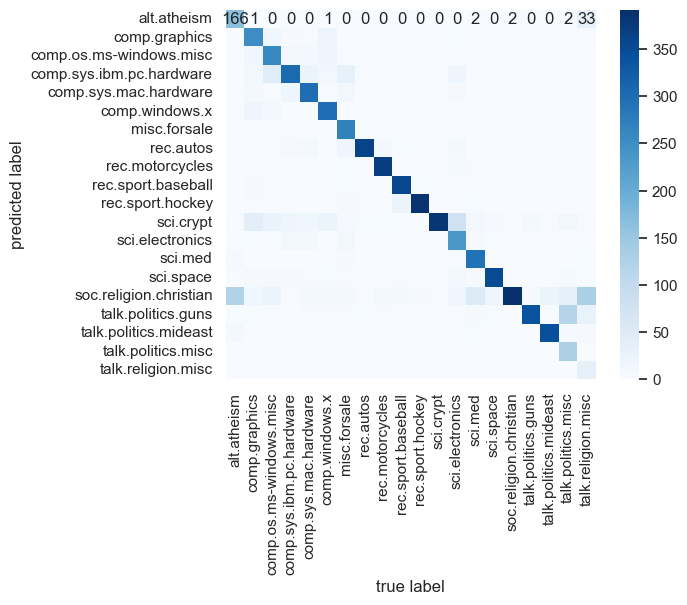

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', 
             xticklabels=train.target_names,
            yticklabels=train.target_names, cmap='Blues')

plt.xlabel('true label')
plt.ylabel('predicted label')

            

In [35]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [51]:
predict_category('loads to international')

'sci.space'

In [52]:
predict_category('cars are fast then bikes')

'rec.autos'

In [54]:
predict_category('president of india')

'talk.politics.misc'